In [279]:
# model params: reaction time, avg speed, following distance,
# The effect on speed from braking is linear

# LINE OF CARS
%matplotlib inline
import math
import copy
import time
import json

t1 = time.time()

n = 10
cars = []
for i in range(n):
    cars.append({
        'v': 0.02,
        'x': i/n,
        'b': [0] * 5,
    })

print(cars)

ts = range(20,50)
bs = [-0.001]*15 + [0.001]*15

braker = 1
time_series = []
iterations = 140
for i in range(iterations):
    print(i, end='\r')
    time_series.append(copy.deepcopy(cars))
#     time_series.append([c['x'] for c in cars])
#     print(time_series)
    cars_old = copy.deepcopy(cars)
#     print(i)
#     print('hello??')
    
    for j, car in enumerate(cars):
#         print(j)
        cars[j]['x'] = car['x'] + car['v']
        cars[j]['v'] += cars[j]['b'][-1]
        if cars[j]['v'] < 0:
            cars[j]['v'] = 0
            
        cars[j]['b'] = [0] + car['b'][:-1]
    
        cars[j]['b'][0] = cars[(j+1)%n]['b'][-1]

        if j == braker and i in ts:
            cars[j]['b'][-1] = bs[i - ts[0]]
            
#         if j == braker:
#             print(cars[j]['b'])
print('done')

[{'v': 0.02, 'x': 0.0, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.1, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.2, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.3, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.4, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.5, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.6, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.7, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.8, 'b': [0, 0, 0, 0, 0]}, {'v': 0.02, 'x': 0.9, 'b': [0, 0, 0, 0, 0]}]
done


0.001


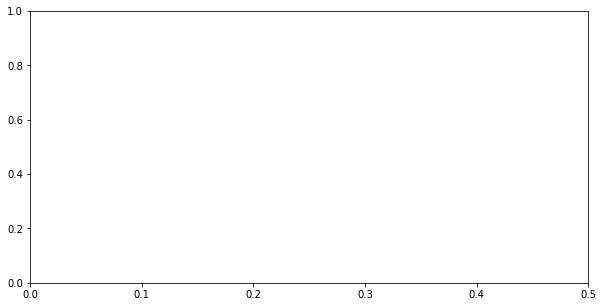

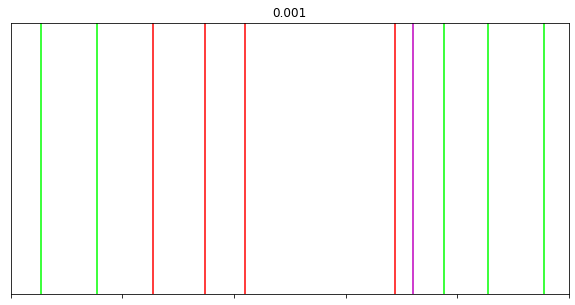

In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='bruh', colors=colors, N=100)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()

max_b = max([max([abs(y['b'][-1]) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = max_b
b_lower_bound = max_b
def animate(i):
    cars = time_series[i]
    print(i, end='\r')
#         print(cars)
    # graph params
    ax.clear()
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    for j, car in enumerate(cars):
        global max_b
#         print(j)
        # highlight the braker and color the rest by acceleration
#             if j == braker and cars[j]['b'] == 0 and i < ts[0]:
#                 ax.axvline(x=car['x']%1, color='m')
#             elif cars[j]['b'] > 0:
#                 ax.axvline(x=car['x']%1, color='g')
#             elif cars[j]['b'] < 0:
#                 ax.axvline(x=car['x']%1, color='r')
#             else:
#                 ax.axvline(x=car['x']%1)
#             print(car['b'])
#             print(abs(car['b']) > max_b)
#             print(car['b'])
#             print(max_b)
        if abs(car['b'][-1]) > max_b and not abs(car['b'][-1]) == braker_val:
            max_b = abs(car['b'][-1])
#             print(car['b'])
#             print(cmap((car['b']+upper_bound)/upper_bound*2))

        if j == 3:
            ax.axvline(x=car['x']%L, color='m')
            ax.set_title(car['b'][-1])
        else:
            ax.axvline(x=car['x']%L, color=cmap((car['b'][-1]+b_lower_bound)/b_upper_bound*2))
            
ani = FuncAnimation(fig, animate, frames=len(time_series), interval=30)
ani

In [247]:
# model params: reaction time, avg speed, following distance, "disruption severity". 
# The effect on speed from braking is linear

# LINE OF CARS
%matplotlib inline
import math
import copy
import time
import json

# cars = []
N = 40
L = 1
# reaction_time = 5
cars = []
for i in range(N):
    cars.append({
#         'v': 0,
        'v': 0.002,
#         'v': .003 * L,
#         'd': 1/n,
        'x': L*i/N,
#         'b': 0,
        'b': 0,
#         'r': 5
    })

print(cars)

cars[5]['x'] += L*0.5/N

ts = range(5,12)
braker_val = .00001
bs = [-braker_val]*4 + [braker_val]*3
# this is the driver sensitivity. Higher = lower reaction time
a = .15
# this is essentially the speed limit
b = .1

braker = 1
time_series = []
crash = False
stop_on_crash = False
iterations = 600
for i in range(iterations):
    global crash
    if not crash or not stop_on_crash:
        print(i, end='\r')
#         print(cars)
        time_series.append(copy.deepcopy(cars))
#         time_series.append([c['x'] for c in cars])
    #     print(time_series)
        cars_old = copy.deepcopy(cars)

        for j, car in enumerate(cars):
            # update x position
            cars[j]['x'] += car['v']
            # update velocity. b is braking, and the length of its array determines the reaction time.
            cars[j]['v'] += car['b']
            # don't go backwards, just stop
            if cars[j]['v'] < 0:
                cars[j]['v'] = 0

            if j+1 == N:
                delta_x = L + cars[0]['x'] - car['x']
            else:
                delta_x = cars[j+1]['x'] - car['x']

            if delta_x < 0:
                crash = True

            cars[j]['b'] = a * (b * math.tanh(delta_x) - car['v'])
#             cars[j]['b'] = a * (b * (math.tanh(delta_x - 2) + math.tanh(2)) - car['v'])

            # braker to initiate wave
#             if j == braker and i in ts:
#                 cars[j]['b'] = bs[i - ts[0]]

if crash:
    print('crash')
print('done')

[{'v': 0.002, 'x': 0.0, 'b': 0}, {'v': 0.002, 'x': 0.025, 'b': 0}, {'v': 0.002, 'x': 0.05, 'b': 0}, {'v': 0.002, 'x': 0.075, 'b': 0}, {'v': 0.002, 'x': 0.1, 'b': 0}, {'v': 0.002, 'x': 0.125, 'b': 0}, {'v': 0.002, 'x': 0.15, 'b': 0}, {'v': 0.002, 'x': 0.175, 'b': 0}, {'v': 0.002, 'x': 0.2, 'b': 0}, {'v': 0.002, 'x': 0.225, 'b': 0}, {'v': 0.002, 'x': 0.25, 'b': 0}, {'v': 0.002, 'x': 0.275, 'b': 0}, {'v': 0.002, 'x': 0.3, 'b': 0}, {'v': 0.002, 'x': 0.325, 'b': 0}, {'v': 0.002, 'x': 0.35, 'b': 0}, {'v': 0.002, 'x': 0.375, 'b': 0}, {'v': 0.002, 'x': 0.4, 'b': 0}, {'v': 0.002, 'x': 0.425, 'b': 0}, {'v': 0.002, 'x': 0.45, 'b': 0}, {'v': 0.002, 'x': 0.475, 'b': 0}, {'v': 0.002, 'x': 0.5, 'b': 0}, {'v': 0.002, 'x': 0.525, 'b': 0}, {'v': 0.002, 'x': 0.55, 'b': 0}, {'v': 0.002, 'x': 0.575, 'b': 0}, {'v': 0.002, 'x': 0.6, 'b': 0}, {'v': 0.002, 'x': 0.625, 'b': 0}, {'v': 0.002, 'x': 0.65, 'b': 0}, {'v': 0.002, 'x': 0.675, 'b': 0}, {'v': 0.002, 'x': 0.7, 'b': 0}, {'v': 0.002, 'x': 0.725, 'b': 0}, {'

TypeError: bad operand type for abs(): 'list'

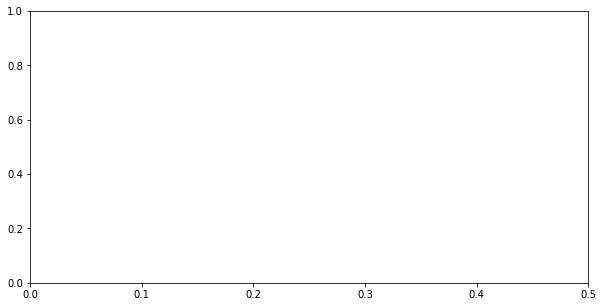

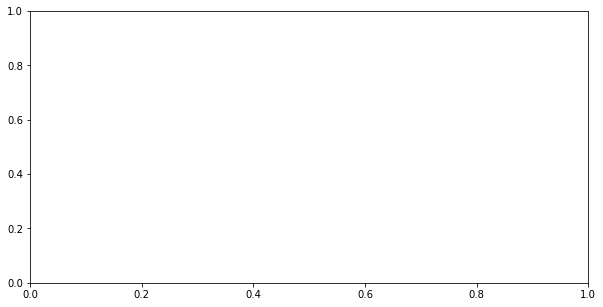

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
# import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='bruh', colors=colors, N=100)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()

max_b = max([max([abs(y['b']) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = max_b
b_lower_bound = max_b
def animate(i):
    cars = time_series[i]
    print(i, end='\r')
#         print(cars)
    # graph params
    ax.clear()
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    for j, car in enumerate(cars):
        global max_b
#         print(j)
        # highlight the braker and color the rest by acceleration
#             if j == braker and cars[j]['b'] == 0 and i < ts[0]:
#                 ax.axvline(x=car['x']%1, color='m')
#             elif cars[j]['b'] > 0:
#                 ax.axvline(x=car['x']%1, color='g')
#             elif cars[j]['b'] < 0:
#                 ax.axvline(x=car['x']%1, color='r')
#             else:
#                 ax.axvline(x=car['x']%1)
#             print(car['b'])
#             print(abs(car['b']) > max_b)
#             print(car['b'])
#             print(max_b)
        if abs(car['b']) > max_b and not abs(car['b']) == braker_val:
            max_b = abs(car['b'])
#             print(car['b'])
#             print(cmap((car['b']+upper_bound)/upper_bound*2))

        if j == 3:
            ax.axvline(x=car['x']%L, color='m')
            ax.set_title(car['b'])
        else:
            ax.axvline(x=car['x']%L, color=cmap((car['b']+b_lower_bound)/b_upper_bound*2))
            

ani = FuncAnimation(fig, animate, frames=len(time_series), interval=30)
ani

In [2]:
print('_____________')
print('_____________')

# print('b')
print('saving/displaying')
# plt.show()
# ani.save('animation.mp4')
print(time.time() - t1)
with open('time_series.json', 'w') as f:
    json.dump(time_series, f)
# ani

_____________
_____________
saving/displaying
42.81901407241821


Text(0.5, 0, 'x')

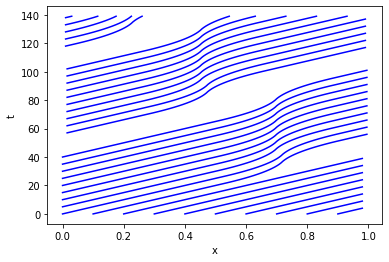

In [280]:
plot_x = []
plot_y = []
trajectories = []
for i in range(5*n):
    trajectories.append([[],[]])
for t,t_x in enumerate(time_series):
    for i,car in enumerate(t_x):
#         print(i)
#         print(x)
#         print(t)
#         print('_______')
#         print(car['x'])
#         print(math.floor(car['x']))
#         print(n)
        new_i = i + n*math.floor(car['x'])
#         print(new_i)
#         print(len(trajectories))
#         if new_i >= len(trajectories):
#             trajectories.append([[], []])
        trajectories[new_i][0].append(car['x']%1)
        trajectories[new_i][1].append(t)
#         trajectories[new_i][2].append(car['b'][-1])
#         plot_x.append(x%1)
#         plot_y.append(t)
    
for traj in trajectories:
    plt.plot(traj[0], traj[1],
             c='b'
            )
# print(trajectories[1])
# plt.plot(trajectories[0][0], trajectories[0][1])
    
plt.rcParams['figure.figsize'] = (15,10)
# plt.scatter(plot_x, plot_y, marker='s')
plt.ylabel('t')
plt.xlabel('x')

Text(0.5, 0, 'x')

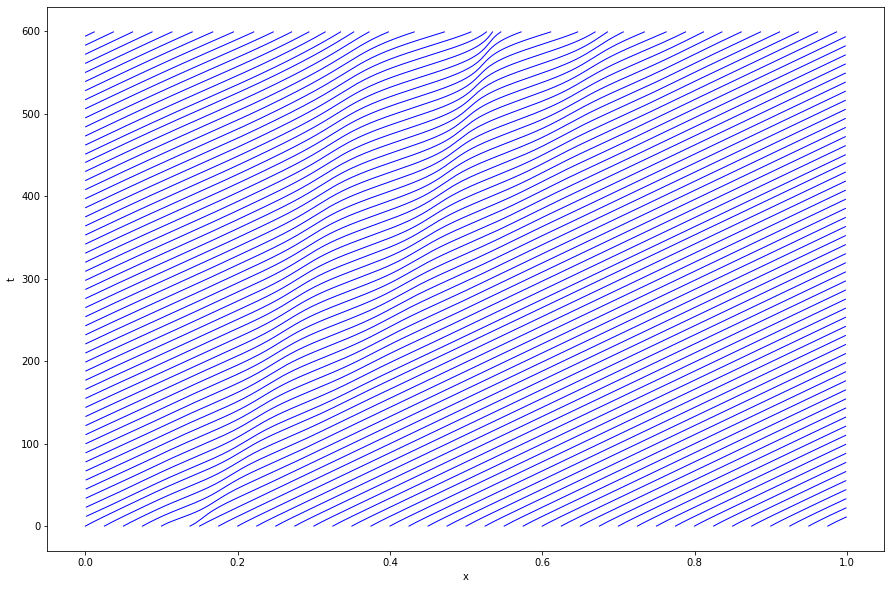

In [270]:
import matplotlib.pyplot as plt
plot_x = []
plot_y = []
trajectories = []
for i in range(10*N):
    trajectories.append([[],[]])
for t,t_x in enumerate(time_series):
    for i,car in enumerate(t_x):
#         print(car['x'])
        new_i = i + N*math.floor(car['x']/L)
#         print(new_i)
        trajectories[new_i][0].append(car['x']%L)
        trajectories[new_i][1].append(t)
#         trajectories[new_i][2].append(car['b'])
    
for traj in trajectories:
    plt.plot(traj[0], traj[1], c='b', linewidth=1)
# print(trajectories[1])
# plt.plot(trajectories[0][0], trajectories[0][1])
    
plt.rcParams['figure.figsize'] = (15,10)
# plt.scatter(plot_x, plot_y, marker='s')
plt.ylabel('t')
plt.xlabel('x')
# plt.ylim(150,300)

In [240]:
plot_x = []
plot_y = []
plot_c = []
for t,t_x in enumerate(time_series):
    for i,c in enumerate(t_x):
        plot_x.append(c['x']%1)
        plot_y.append(t)
        plot_c.append(c['b'][-1])
    
    
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(plot_x, plot_y, marker='s', c=plot_c)
plt.ylabel('t')
plt.xlabel('x')

TypeError: 'int' object is not subscriptable

0.00023227641833184265


Text(0.5, 0, 'x')

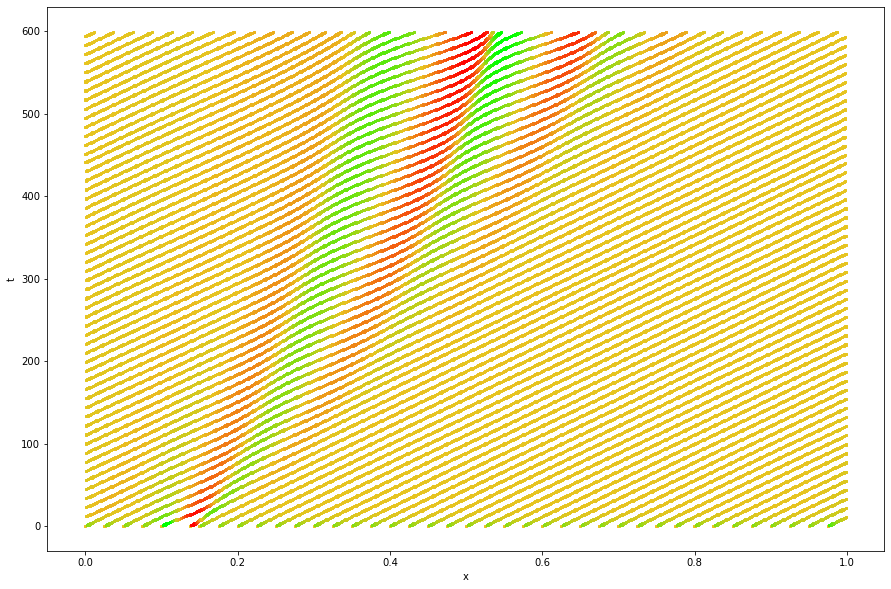

In [269]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (232/255, 195/255, 32/255), (0, 1, 0)]  # R -> B -> G
cmap = LinearSegmentedColormap.from_list(name='bruh', colors=colors, N=100)

max_b = max([max([abs(y['b']) for y in x]) for x in time_series])
print(max_b)
b_upper_bound = .0001
b_lower_bound = .0001
# b_upper_bound = max_b
# b_lower_bound = max_b

plot_x = []
plot_y = []
plot_c = []
for t,t_x in enumerate(time_series):
    for i,c in enumerate(t_x):
        plot_x.append(c['x']%L)
        plot_y.append(t)
#         plot_c.append(c['b'])
        b_val = (c['b']+b_lower_bound)/(b_upper_bound*2)
        if b_val > 1:
            plot_c.append(1)
        elif b_val < 0:
            plot_c.append(0)
        else:
            plot_c.append(b_val)
    
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(plot_x, plot_y, marker='s', c=plot_c, s=5, cmap=cmap)
plt.ylabel('t')
plt.xlabel('x')
# plt.ylim(700,800)

In [262]:
cmap(6)

(0.8787878787878788, 0.0, 0.12121212121212122, 1.0)

In [259]:
plot_c

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 2.746958893496513,
 2.746958893496513,
 2.74695889349651,
 2.7469588934965197,
 12.11382091659213,
 -6.625289393487767,
 2.74695889349651,
 2.7469588934965294,
 2.74695889349651,
 2.74695889349651,
 2.7469588934965294,
 2.7469588934964873,
 2.7469588934965294,
 2.7469588934964873,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934964873,
 2.7469588934965294,
 2.7469588934964873,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934965294,
 2.746958893496448,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934965294,
 2.746958893496448,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934965294,
 2.746958893496448,
 2.7469588934965294,
 2.7469588934965294,
 2.7469588934965294,
 2.746958893496529

In [106]:
cells = []
N = 30
iterations = 100
for i in range(N):
    if i%2 == 0 or i == 7 or i == 9:
        cells.append(True)
    else:
        cells.append(False)
# print(cells)
cell_series = [copy.deepcopy(cells)]
# print(cell_series)
for i in range(iterations):
#     global cell_series
    cells_old = copy.deepcopy(cells)
    for j, cell in enumerate(cells_old):
#         print(cells_old)
#         print(cells)
        if cells_old[(j-1)]:
            if cells_old[(j+1)%N]:
#                 print(1)
                cells[j] = True
            elif cell:
#                 print(2)
                cells[j] = False
            else:
#                 print(3)
                cells[j] = True
        else:
            if cells_old[(j+1)%N]:
                if cell:
#                     print(4)
                    cells[j] = True
                else:
#                     print(5)
                    cells[j] = False
            else:
#                 print(6)
                cells[j] = False
#     print('-------')
#     print(cells)
#     print(cell_series)
    cell_series.append(copy.deepcopy(cells))
#     time_series.append([{'x': j} for j,])
# print(cell_series)

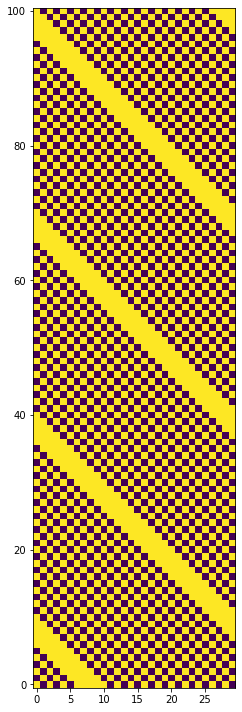

In [107]:
import matplotlib
import numpy as np

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.imshow(cell_series, interpolation='none')
ax.invert_yaxis()

In [54]:
cell_series

[[False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
 